# **Project Tugas Akhir**

- Nama: Rizky Amalia
- NIM: 19142037P
- Prodi: Teknik Informatika

# Import Library

In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt # Untuk membuat grafik 
import matplotlib.image as mpimg
%matplotlib inline
from imutils import paths # Untuk mengakses dataset
import seaborn as sns
import pandas as pd
import time
from IPython.display import clear_output

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications import MobileNetV2   # Pre-trained model MobileNetV2
from tensorflow.keras.layers import AveragePooling2D    # Pooling menggunakan Average Pooling
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Optimizer (gradient descent)
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

# Untuk Preprocess Data
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input # scaling value pixel dari (0,255) ke (-1,1)
from tensorflow.keras.preprocessing.image import ImageDataGenerator # generate data besar dengan menggunakan sedikit data
from tensorflow.keras.preprocessing.image import load_img           # load image untuk kemudian dikonversi ke array
from tensorflow.keras.preprocessing.image import img_to_array       # konversi image ke bentuk array agar bisa diproses mesin
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer                    # konversi label dalam bentuk angka biner (0,1)
from sklearn.model_selection import train_test_split                # splitting data menjadi data training dan data testing
from sklearn.metrics import classification_report                   # untuk mengetahui/evaluasi model yang telah dilatih
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Preprocessing Data

## Load Data

In [3]:
dataset =r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\0 Dataset' # mengakses lokasi dataset
path_img = list(paths.list_images(dataset)) #tampung seluruh dataset dalam 1 list

path_img[:5]

['D:\\OneDrive\\Kuliah\\KULIAH\\MATA KULIAH\\Semester 5\\Project\\0 Dataset\\masker\\0-with-mask.jpg',
 'D:\\OneDrive\\Kuliah\\KULIAH\\MATA KULIAH\\Semester 5\\Project\\0 Dataset\\masker\\1-with-mask.jpg',
 'D:\\OneDrive\\Kuliah\\KULIAH\\MATA KULIAH\\Semester 5\\Project\\0 Dataset\\masker\\10-with-mask.jpg',
 'D:\\OneDrive\\Kuliah\\KULIAH\\MATA KULIAH\\Semester 5\\Project\\0 Dataset\\masker\\100-with-mask.jpg',
 'D:\\OneDrive\\Kuliah\\KULIAH\\MATA KULIAH\\Semester 5\\Project\\0 Dataset\\masker\\101-with-mask.jpg']

## Proses Preprocessing

- Membuat Label/Class
- Resize dan Konversi Data Gambar ke Array
- Scaling Array dari (0,255) ke (-1,1)
- Menampung data image ke variabel

In [4]:
data = []
label = []

for i in path_img:
    # Membuat Label
    lab = i.split(os.path.sep)[-2]
    label.append(lab)
    
    # Resize ke ukuran yang ditentukan oleh MobileNetV2 yaitu (224 x 224)
    img = load_img(i, target_size=(224,224))
    
    # Konversi image ke array
    img = img_to_array(img)
    
    # Scaling Array dari (0,255) ke (-1,1)
    img = preprocess_input(img)
    
    # Tampung seluruh pixel image ke variabel data
    data.append(img)

In [5]:
#Agar bisa ditraining, seluruh data diubah ke dalam array, bukan list
data= np.array(data, dtype='float32')
label = np.array(label)

In [6]:
(value, jumlah) = np.unique(label, return_counts=True)
freq = pd.DataFrame(np.column_stack((value, jumlah)), columns=['label', 'jumlah'])

freq

,label,jumlah
0,masker,1000
1,tidak_bermasker,1029


In [7]:
data.shape[0]
# Total Data, Dimensi, Channel

2029

## Konversi Label ke Biner lalu diubah menjadi matrix binary class

In [8]:
# Konversi Categorical Label > Binary Array 1 dimensi
lb = LabelBinarizer()
labels = lb.fit_transform(label)

# Konversi Binary Array 1 dimensi > Binary Class Matrix
label2cat = to_categorical(labels)

In [9]:
label2cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Data Splitting

- 80 % Training
- 20 % Test
- Random State agar data tidak berubah secara random
- Stratify agar data dapat terbagi secara proporsional

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label2cat, test_size=0.2, random_state=10, stratify=label)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=10)

In [12]:
# Dimensi Data Training
print(X_train.shape) 
print(y_train.shape)

(1379, 224, 224, 3)
(1379, 2)


In [13]:
# Dimensi Data Validation
print(X_val.shape) 
print(y_val.shape)

(244, 224, 224, 3)
(244, 2)


In [14]:
# Dimensi Data Testing
print(X_test.shape) 
print(y_test.shape)

(406, 224, 224, 3)
(406, 2)


In [15]:
X_train

array([[[[-0.2862745 , -0.09019607, -0.8117647 ],
         [-0.30196077, -0.09803921, -0.8117647 ],
         [-0.29411763, -0.11372548, -0.81960785],
         ...,
         [ 0.30196083,  0.09019613, -0.1372549 ],
         [ 0.28627455,  0.07450986, -0.15294117],
         [ 0.27058828,  0.03529418, -0.18431371]],

        [[-0.25490195, -0.06666666, -0.8352941 ],
         [-0.26274508, -0.06666666, -0.8039216 ],
         [-0.23921567, -0.05882353, -0.77254903],
         ...,
         [ 0.30196083,  0.07450986, -0.1607843 ],
         [ 0.2941177 ,  0.082353  , -0.15294117],
         [ 0.27058828,  0.05882359, -0.16862744]],

        [[-0.21568626,  0.00392163, -0.78039217],
         [-0.23137254, -0.01960784, -0.7647059 ],
         [-0.19999999, -0.01960784, -0.73333335],
         ...,
         [ 0.3176471 ,  0.09019613, -0.14509803],
         [ 0.30980396,  0.07450986, -0.14509803],
         [ 0.2941177 ,  0.082353  , -0.14509803]],

        ...,

        [[ 0.8745098 ,  0.6627451 ,  0

In [16]:
X_test

array([[[[ 0.26274514,  0.30196083,  0.254902  ],
         [ 0.254902  ,  0.2941177 ,  0.24705887],
         [ 0.23921573,  0.27843142,  0.2313726 ],
         ...,
         [-0.6313726 , -0.73333335, -0.8039216 ],
         [-0.654902  , -0.75686276, -0.827451  ],
         [-0.654902  , -0.75686276, -0.81960785]],

        [[ 0.27058828,  0.30980396,  0.26274514],
         [ 0.26274514,  0.30196083,  0.254902  ],
         [ 0.24705887,  0.28627455,  0.23921573],
         ...,
         [-0.67058825, -0.77254903, -0.84313726],
         [-0.6784314 , -0.78039217, -0.8509804 ],
         [-0.6784314 , -0.78039217, -0.84313726]],

        [[ 0.26274514,  0.30196083,  0.254902  ],
         [ 0.254902  ,  0.2941177 ,  0.24705887],
         [ 0.23921573,  0.27843142,  0.2313726 ],
         ...,
         [-0.67058825, -0.77254903, -0.84313726],
         [-0.6784314 , -0.78039217, -0.8509804 ],
         [-0.6784314 , -0.78039217, -0.84313726]],

        ...,

        [[-0.09019607, -0.24705881, -0

## Augmentasi Data

In [17]:
aug = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [18]:
aug

### Contoh Augmentasi

#### Image Asli

In [19]:
# images = []
# for img_path in glob.glob(path_img[105]):
#     images.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(images):
#     plt.subplot(len(images) / columns + 1, columns, i + 1)
#     plt.imshow(image)
#     plt.axis('off')

#### Image Hasil Augmentasi

In [20]:
# img = load_img(path_img[105])  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# # the .flow() command below generates batches of randomly transformed images
# # and saves the results to the `preview/` directory
# i = 0
# for batch in aug.flow(x, batch_size=1,
#                           save_to_dir='1 Preview', save_prefix='Ex', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [21]:
# images = []
# for img_path in glob.glob('1 Preview/*.jpeg'):
#     images.append(mpimg.imread(img_path))

# plt.figure(figsize=(20,10))
# columns = 5
# for i, image in enumerate(images):
#     plt.subplot(len(images) / columns + 1, columns, i + 1)
#     plt.imshow(image)
#     plt.axis('off')
# plt.show()

# Feature Extraction



## MobileNet V2

- Menggunakan Pre-trained Model yang telah digunakan dalam ILSVRC: MobileNetV2
- MobileNet V2 merupakan salah satu pre-trained model yang powerful dengan tingkat komputasi yang kecil. Unduh feature extractor pada model MobileNet V2, dengan tidak menyertakan bagian Classifier-nya
- How Transfer Learning Works: https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

<img src="transferlearning-119.jpg">

In [22]:
baseModel = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))

baseModel_adam = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))
baseModel_sgd = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))
baseModel_rmsprop = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224,3)))


C:\Users\User\miniconda3\envs\coba_env\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [23]:
# Summary arsitektur MobileNetV2 yang telah diunduh. Classifier tidak diunduh. 

# MobileNetV2 tanpa Classifier
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [24]:
baseModel.output

<tf.Tensor 'out_relu/Identity:0' shape=(None, 7, 7, 1280) dtype=float32>

# Klasifikasi 

## Classifier yang Dimodifikasi Sesuai Dataset

Output dari baseModel >> Pooling (AveragePooling) >> Flattening >> Buat Dense Layer >> Buat Dropout Layer >> Buat Dense Layer terakhir untuk menampung output (Output Layer)

In [25]:
# # Model Utama
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(7,7))(headModel)
# headModel = Flatten(name='Flatten')(headModel)
# headModel = Dense(128, activation='relu')(headModel)
# headModel = Dropout(0.5)(headModel) # Dropout = pilih neuron secara acak untuk tidak diikutsertakan dalam proses training untuk mengurangi overfitting
# headModel = Dense(2, activation='softmax')(headModel)

# model = Model(inputs=baseModel.input, outputs=headModel)

In [26]:
# ADAM
headModel_adam = baseModel_adam.output
headModel_adam = AveragePooling2D(pool_size=(7,7))(headModel_adam)
headModel_adam = Flatten(name='Flatten')(headModel_adam)
headModel_adam = Dense(128, activation='relu')(headModel_adam)
headModel_adam = Dropout(0.5)(headModel_adam) # Dropout = pilih neuron secara acak untuk tidak diikutsertakan dalam proses training untuk mengurangi overfitting
headModel_adam = Dense(2, activation='softmax')(headModel_adam)

model_adam = Model(inputs=baseModel_adam.input, outputs=headModel_adam)

In [27]:
# SGD
headModel_sgd = baseModel_sgd.output
headModel_sgd = AveragePooling2D(pool_size=(7,7))(headModel_sgd)
headModel_sgd = Flatten(name='Flatten')(headModel_sgd)
headModel_sgd = Dense(128, activation='relu')(headModel_sgd)
headModel_sgd = Dropout(0.5)(headModel_sgd) # Dropout = pilih neuron secara acak untuk tidak diikutsertakan dalam proses training untuk mengurangi overfitting
headModel_sgd = Dense(2, activation='softmax')(headModel_sgd)

model_sgd = Model(inputs=baseModel_sgd.input, outputs=headModel_sgd)

In [28]:
# RMSprop
headModel_rmsprop = baseModel_rmsprop.output
headModel_rmsprop = AveragePooling2D(pool_size=(7,7))(headModel_rmsprop)
headModel_rmsprop = Flatten(name='Flatten')(headModel_rmsprop)
headModel_rmsprop = Dense(128, activation='relu')(headModel_rmsprop)
headModel_rmsprop = Dropout(0.5)(headModel_rmsprop) # Dropout = pilih neuron secara acak untuk tidak diikutsertakan dalam proses training untuk mengurangi overfitting
headModel_rmsprop = Dense(2, activation='softmax')(headModel_rmsprop)

model_rmsprop = Model(inputs=baseModel_rmsprop.input, outputs=headModel_rmsprop)

In [29]:
# MobileNetV2 setelah ditambahkan Classifier baru. Trainable params = mobilenetv2 awal + classifier baru
model_adam.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [30]:
# Melepas params trainable baseModel
# for layer in baseModel.layers:
#     layer.trainable = False

In [31]:
# Melepas params trainable baseModel

# Adam
for layer in baseModel_adam.layers:
    layer.trainable = False

# SGD
for layer in baseModel_sgd.layers:
    layer.trainable = False

# RMSprop
for layer in baseModel_rmsprop.layers:
    layer.trainable = False

In [32]:
# Trainable params = Classifier yang baru saja dibuat
model_adam.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

## Fine Tuning dengan Learning Rate

In [33]:
# class myCallbacks(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('accuracy')>=0.93):
# #             print("\nAkurasi telah mencapai 93%. Untuk efisiensi, proses training diakhiri!")
#             self.model.stop_training = True

# my_call = myCallbacks()

In [34]:
# my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=7, monitor='val_accuracy', mode='max', restore_best_weights=True),
#     tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', mode='min', restore_best_weights=True)
# ]

In [35]:
# learning_rate = 1e-4
# Epochs = 20
# bs = 32


# # Mengaplikasikan optimizer
# opt = Adam(lr=learning_rate, decay=learning_rate/Epochs)
# model.compile(loss='binary_crossentropy', 
#               optimizer=opt, 
#               metrics=['accuracy'])

# h = model.fit(
#     aug.flow(X_train, y_train, batch_size=bs),
#     steps_per_epoch = len(X_train)//bs,
#     validation_data = (X_test, y_test),
#     validation_steps = len(X_test)//bs,
#     epochs = Epochs
# #     callbacks = my_callbacks 
# )

# model.save(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Save\mobilenet_v2.model')

In [36]:
learning_rate = 1e-3
Epochs = 50
bs = 20

In [37]:
# Model ADAM

# Mengaplikasikan optimizer
opt = Adam(lr=learning_rate, decay=learning_rate/Epochs)
model_adam.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

h_adam = model_adam.fit(
    aug.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch = len(X_train)//bs,
    validation_data = (X_val, y_val),
    validation_steps = len(X_val)//bs,
    epochs = Epochs
)

model_adam.save(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Save\model_adam\mobilenet_v2.model')

Train for 68 steps, validate on 244 samples
Epoch 1/50
68/68 [==============================] - 23s 342ms/step - loss: 0.4609 - accuracy: 0.7896 - val_loss: 0.2292 - val_accuracy: 0.9167
Epoch 2/50
68/68 [==============================] - 16s 235ms/step - loss: 0.2977 - accuracy: 0.8727 - val_loss: 0.1943 - val_accuracy: 0.9250
Epoch 3/50
68/68 [==============================] - 16s 237ms/step - loss: 0.2503 - accuracy: 0.8926 - val_loss: 0.1455 - val_accuracy: 0.9333
Epoch 4/50
68/68 [==============================] - 16s 234ms/step - loss: 0.2802 - accuracy: 0.8859 - val_loss: 0.1692 - val_accuracy: 0.9292
Epoch 5/50
68/68 [==============================] - 15s 223ms/step - loss: 0.2709 - accuracy: 0.8889 - val_loss: 0.5513 - val_accuracy: 0.7750
Epoch 6/50
68/68 [==============================] - 15s 222ms/step - loss: 0.2287 - accuracy: 0.9146 - val_loss: 0.2227 - val_accuracy: 0.9000
Epoch 7/50
68/68 [==============================] - 14s 210ms/step - loss: 0.2345 - accuracy: 0.90

In [38]:
# Model SGD

# Mengaplikasikan optimizer
opt = SGD(lr=learning_rate, decay=learning_rate/Epochs)
model_sgd.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

h_sgd = model_sgd.fit(
    aug.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch = len(X_train)//bs,
    validation_data = (X_val, y_val),
    validation_steps = len(X_val)//bs,
    epochs = Epochs
)

model_sgd.save(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Save\model_sgd\mobilenet_v2.model')

Train for 68 steps, validate on 244 samples
Epoch 1/50
68/68 [==============================] - 25s 361ms/step - loss: 0.7906 - accuracy: 0.5659 - val_loss: 0.6669 - val_accuracy: 0.5958
Epoch 2/50
68/68 [==============================] - 19s 274ms/step - loss: 0.7028 - accuracy: 0.5968 - val_loss: 0.6210 - val_accuracy: 0.6208
Epoch 3/50
68/68 [==============================] - 18s 258ms/step - loss: 0.6578 - accuracy: 0.6387 - val_loss: 0.5756 - val_accuracy: 0.6542
Epoch 4/50
68/68 [==============================] - 18s 266ms/step - loss: 0.5946 - accuracy: 0.6880 - val_loss: 0.5654 - val_accuracy: 0.6708
Epoch 5/50
68/68 [==============================] - 17s 253ms/step - loss: 0.5656 - accuracy: 0.7020 - val_loss: 0.4987 - val_accuracy: 0.7250
Epoch 6/50
68/68 [==============================] - 17s 243ms/step - loss: 0.5344 - accuracy: 0.7336 - val_loss: 0.4903 - val_accuracy: 0.7292
Epoch 7/50
68/68 [==============================] - 18s 261ms/step - loss: 0.4964 - accuracy: 0.76

KeyboardInterrupt: 

In [ ]:
# Model RMSprop

# Mengaplikasikan optimizer
opt = RMSprop(lr=learning_rate, decay=learning_rate/Epochs)
model_rmsprop.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

h_rmsprop = model_rmsprop.fit(
    aug.flow(X_train, y_train, batch_size=bs),
    steps_per_epoch = len(X_train)//bs,
    validation_data = (X_val, y_val),
    validation_steps = len(X_val)//bs,
    epochs = Epochs
)

model_rmsprop.save(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Save\model_rmsprop\mobilenet_v2.model')

# Model Evaluation

In [ ]:
sc_train_adam = model_adam.evaluate(X_train, y_train, verbose=0)
sc_test_adam = model_adam.evaluate(X_test, y_test, verbose=0)

sc_train_sgd = model_sgd.evaluate(X_train, y_train, verbose=0)
sc_test_sgd = model_sgd.evaluate(X_test, y_test, verbose=0)

sc_train_rmsprop = model_rmsprop.evaluate(X_train, y_train, verbose=0)
sc_test_rmsprop = model_rmsprop.evaluate(X_test, y_test, verbose=0)

data = {
    "Optimasi" : ['ADAM','SGD','RMSprop'],
    "Train Acc" : [round(sc_train_adam[1]*100,2), round(sc_train_sgd[1]*100,2),round(sc_train_rmsprop[1]*100,2)],
    "Test Acc" : [round(sc_test_adam[1]*100,2), round(sc_test_sgd[1]*100,2),round(sc_test_rmsprop[1]*100,2)],
    "Train Loss" : [round(sc_train_adam[0]*100,2), round(sc_train_sgd[0]*100,2),round(sc_train_rmsprop[0]*100,2)],
    "Test Loss" : [round(sc_test_adam[0]*100,2), round(sc_test_sgd[0]*100,2),round(sc_test_rmsprop[0]*100,2)]
}

df = pd.DataFrame(data)
df.set_index("Optimasi", inplace=True)
df

In [ ]:
ax1 = df.plot(kind='bar', rot=0, figsize=(12,5))
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Accuracy & Loss Plot

### Plot ADAM

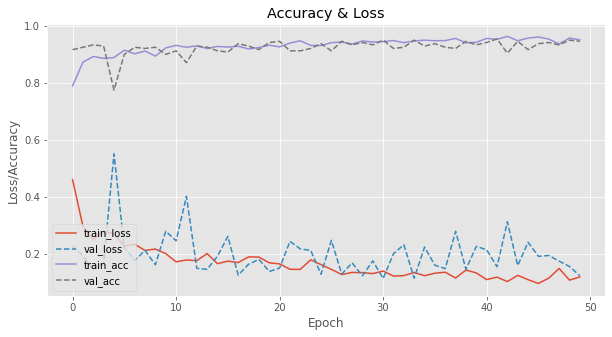

In [39]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(h_adam.history['loss'], label="train_loss")
plt.plot(h_adam.history['val_loss'],linestyle='dashed', label="val_loss")
plt.plot(h_adam.history['accuracy'], label="train_acc")
plt.plot(h_adam.history['val_accuracy'],linestyle='dashed', label="val_acc")
plt.title("Accuracy & Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Ev_adam\loss_accuracy.png')


### Plot SGD

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(h_sgd.history['loss'], label="train_loss")
plt.plot(h_sgd.history['val_loss'],linestyle='dashed', label="val_loss") 
plt.plot(h_sgd.history['accuracy'], label="train_acc")
plt.plot(h_sgd.history['val_accuracy'],linestyle='dashed', label="val_acc")
plt.title("Accuracy & Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Ev_sgd\loss_accuracy.png')


### Plot RMSprop

In [ ]:
# plot the training loss and accuracy

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(h_rmsprop.history['loss'], label="train_loss")
plt.plot(h_rmsprop.history['val_loss'],linestyle='dashed', label="val_loss") 
plt.plot(h_rmsprop.history['accuracy'], label="train_acc")
plt.plot(h_rmsprop.history['val_accuracy'],linestyle='dashed', label="val_acc")
plt.title("Accuracy & Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Ev_rmsprop\loss_accuracy.png')


### Comparative Plot

In [ ]:
# plot the training accuracy

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(h_adam.history['accuracy'], label="ADAM")
plt.plot(h_sgd.history['accuracy'], linestyle='dashdot', label="SGD")
plt.plot(h_rmsprop.history['accuracy'], linestyle='dashed', label="RMSprop")

plt.title("Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Gabungan\train_accuracy.png')


In [ ]:
# plot the Validation accuracy

plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(h_adam.history['val_accuracy'], label="ADAM")
plt.plot(h_sgd.history['val_accuracy'], linestyle='dashdot' , label="SGD")
plt.plot(h_rmsprop.history['val_accuracy'],linestyle='dashed', label="RMSprop")

plt.title("Val Accuracy Plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Gabungan\val_accuracy.png')


In [ ]:
# plot the Training loss

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(h_adam.history['loss'], label="ADAM")
plt.plot(h_sgd.history['loss'], linestyle='dashdot', label="SGD")
plt.plot(h_rmsprop.history['loss'],linestyle='dashed', label="RMSprop")

plt.title("Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Gabungan\training_loss.png')


In [ ]:
# plot the Validation loss

plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.plot(h_adam.history['val_loss'], label="ADAM")
plt.plot(h_sgd.history['val_loss'], linestyle='dashdot', label="SGD")
plt.plot(h_rmsprop.history['val_loss'], linestyle='dashed', label="RMSprop")

plt.title("Validation Loss Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Project\Mod_Ev\Gabungan\val_loss.png')


## Confusion Matrix

### ADAM

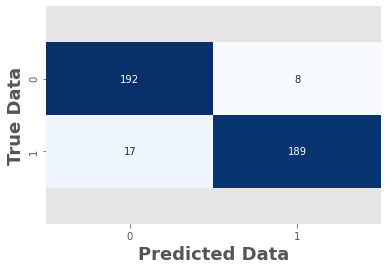

In [40]:
predict_adam = model_adam.predict(X_test, batch_size=bs)
predict_adam = np.argmax(predict_adam, axis=1)

testing_adam = np.argmax(y_test, axis=1)
cm_adam = confusion_matrix(y_true=testing_adam, y_pred=predict_adam)
cm_adam

ax = sns.heatmap(cm_adam, cbar=False, cmap='Blues', annot=True, fmt='d')
plt.setp(ax.get_xticklabels(),rotation=0)

plt.ylabel('True Data', fontweight='bold', fontsize=18)
plt.xlabel('Predicted Data', fontweight='bold', fontsize=18)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

[1. 0.]
0


C:\Users\User\miniconda3\envs\coba_env\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


(array(['masker', 'tdk masker'], dtype='<U10'),
 array([1000, 1029], dtype=int64))

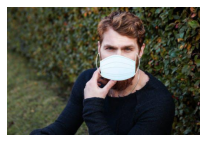

In [41]:
print(label2cat[0])

lab = np.argmax(label2cat, axis=1)
print(lab[0])

images = []
for img_path in glob.glob(path_img[0]):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.axis('off')
    

kelas = []

       
kelas = ["masker" if i == 0 else "tdk masker" for i in lab]
values, counts = np.unique(kelas, return_counts=True)

values, counts

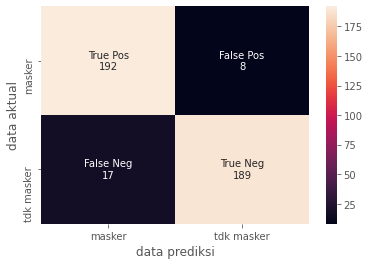

In [42]:
group_names_adam = ['True Pos','False Pos','False Neg','True Neg']
group_counts_adam = ['{0:0.0f}'.format(value) for value in
                cm_adam.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_adam])
axis_label_act_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_adam])
labels_adam = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_adam, group_counts_adam)]
labels_adam = np.asarray(labels_adam).reshape(2,2)
sns.heatmap(cm_adam, 
            annot=labels_adam, 
            fmt='', 
            xticklabels=axis_label_act_adam, 
            yticklabels=axis_label_pred_adam)
plt.xlabel("data prediksi")
plt.ylabel("data aktual")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_ADAM.png')

In [ ]:
group_names_adam = ['True Pos','False Pos','False Neg','True Neg']
group_counts_adam = ['{0:0.0f}'.format(value) for value in
                cm_adam.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_adam = np.unique(["masker" if i == 1 else "tdk masker" for i in predict_adam])
axis_label_act_adam = np.unique(["masker" if i == 1 else "tdk masker" for i in testing_adam])
labels_adam = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_adam, group_counts_adam)]
labels_adam = np.asarray(labels_adam).reshape(2,2)
sns.heatmap(cm_adam, 
            annot=labels_adam, 
            fmt='', 
            xticklabels=axis_label_act_adam, 
            yticklabels=axis_label_pred_adam)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_ADAM-trans.png')

### SGD

In [ ]:
predict_sgd = model_sgd.predict(X_test, batch_size=bs)
predict_sgd = np.argmax(predict_sgd, axis=1)

testing_sgd = np.argmax(y_test, axis=1)
cm_sgd = confusion_matrix(y_true=testing_sgd, y_pred=predict_sgd)

In [ ]:
group_names_sgd = ['True Pos','False Pos','False Neg','True Neg']
group_counts_sgd = ['{0:0.0f}'.format(value) for value in
                cm_sgd.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_sgd])
axis_label_act_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_sgd])
labels_sgd = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_sgd, group_counts_sgd)]
labels_sgd = np.asarray(labels_sgd).reshape(2,2)
sns.heatmap(cm_sgd, 
            annot=labels_sgd, 
            fmt='', 
            xticklabels=axis_label_act_sgd, 
            yticklabels=axis_label_pred_sgd)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_SGD.png')

In [ ]:
group_names_sgd = ['True Pos','False Pos','False Neg','True Neg']
group_counts_sgd = ['{0:0.0f}'.format(value) for value in
                cm_sgd.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_sgd = np.unique(["masker" if i == 1 else "tdk masker" for i in predict_sgd])
axis_label_act_sgd = np.unique(["masker" if i == 1 else "tdk masker" for i in testing_sgd])
labels_sgd = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_sgd, group_counts_sgd)]
labels_sgd = np.asarray(labels_sgd).reshape(2,2)
sns.heatmap(cm_sgd, 
            annot=labels_sgd, 
            fmt='', 
            xticklabels=axis_label_act_sgd, 
            yticklabels=axis_label_pred_sgd)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_SGD-trans.png')

### RMSprop

In [ ]:
predict_rmsprop = model_rmsprop.predict(X_test, batch_size=bs)
predict_rmsprop = np.argmax(predict_rmsprop, axis=1)

testing_rmsprop = np.argmax(y_test, axis=1)
cm_rmsprop = confusion_matrix(y_true=testing_rmsprop, y_pred=predict_rmsprop)

In [ ]:
group_names_rmsprop = ['True Pos','False Pos','False Neg','True Neg']
group_counts_rmsprop = ['{0:0.0f}'.format(value) for value in
                cm_rmsprop.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_rmsprop])
axis_label_act_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_rmsprop])
labels_rmsprop = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_rmsprop, group_counts_rmsprop)]
labels_rmsprop = np.asarray(labels_rmsprop).reshape(2,2)
sns.heatmap(cm_rmsprop, 
            annot=labels_rmsprop, 
            fmt='', 
            xticklabels=axis_label_act_rmsprop, 
            yticklabels=axis_label_pred_rmsprop)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_RMSprop.png')

In [ ]:
group_names_rmsprop = ['True Pos','False Pos','False Neg','True Neg']
group_counts_rmsprop = ['{0:0.0f}'.format(value) for value in
                cm_rmsprop.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_rmsprop = np.unique(["masker" if i == 1 else "tdk masker" for i in predict_rmsprop])
axis_label_act_rmsprop = np.unique(["masker" if i == 1 else "tdk masker" for i in testing_rmsprop])
labels_rmsprop = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_rmsprop, group_counts_rmsprop)]
labels_rmsprop = np.asarray(labels_rmsprop).reshape(2,2)
sns.heatmap(cm_rmsprop, 
            annot=labels_rmsprop, 
            fmt='', 
            xticklabels=axis_label_act_rmsprop, 
            yticklabels=axis_label_pred_rmsprop)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_RMSprop-trans.png')

## Classification Report

### ADAM

In [50]:

print(classification_report(y_test.argmax(axis=1), predict_adam, target_names=lb.classes_))


                 precision    recall  f1-score   support

         masker       0.92      0.96      0.94       200
tidak_bermasker       0.96      0.92      0.94       206

       accuracy                           0.94       406
      macro avg       0.94      0.94      0.94       406
   weighted avg       0.94      0.94      0.94       406



In [55]:
def myscores(cm_adam): 
    tp = cm_adam[0][0] 
    fp = cm_adam[0][1] 
    fn = cm_adam[1][0] 
    tn = cm_adam[1][1] 
    return (tp+tn)/(tp+tn+fp+fn), tp/(tp+fp), tp/(tp+fn)

print("accuracy, precision and recall:", myscores(cm_adam))

accuracy, precision and recall: (0.9384236453201971, 0.96, 0.9186602870813397)


In [57]:
cm_adam = classification_report(y_test.argmax(axis=1), predict_adam, target_names=lb.classes_, output_dict=True)

cm_adam = pd.DataFrame(cm_adam).transpose()
cm_adam

,precision,recall,f1-score,support
masker,0.918660,0.960000,0.938875,200.000000
tidak_bermasker,0.959391,0.917476,0.937965,206.000000
accuracy,0.938424,0.938424,0.938424,0.938424
macro avg,0.939026,0.938738,0.938420,406.000000
weighted avg,0.939327,0.938424,0.938414,406.000000


### SGD

In [ ]:
cr_sgd = classification_report(y_test.argmax(axis=1), predict_sgd, target_names=lb.classes_, output_dict=True)

cr_sgd = pd.DataFrame(cr_sgd).transpose()
cr_sgd

### RMSprop

In [ ]:
cr_rmsprop = classification_report(y_test.argmax(axis=1), predict_rmsprop, target_names=lb.classes_, output_dict=True)

cr_rmsprop = pd.DataFrame(cr_rmsprop).transpose()
cr_rmsprop

### Classification Report Plot

#### Metriks Plot

In [ ]:
acc_adam = round(accuracy_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
rec_adam = round(recall_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
prec_adam = round(precision_score(y_true=testing_adam, y_pred=predict_adam)*100,2)

acc_sgd = round(accuracy_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
rec_sgd = round(recall_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
prec_sgd = round(precision_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)

acc_rmsprop = round(accuracy_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
rec_rmsprop = round(recall_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
prec_rmsprop = round(precision_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)


dt_metrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [acc_adam, prec_adam, rec_adam],
    'SGD' : [acc_sgd, prec_sgd, rec_sgd],
    'RMSprop' : [acc_rmsprop, prec_rmsprop, rec_rmsprop]
}

dt_metrik = pd.DataFrame(dt_metrik)
dt_metrik.set_index("Metriks", inplace=True)
dt_metrik

In [ ]:
ax0 = dt_metrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Model Evaluation')
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot Metriks 3 Optimasi.png')

#### Average Metriks Plot

In [ ]:
dt_avgmetrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [round((cr_adam['precision']['accuracy']+cr_adam['precision']['accuracy'])/2*100,2),
             round((cr_adam['precision']['masker']+cr_adam['precision']['tidak_bermasker'])/2*100,2),
             round((cr_adam['recall']['masker']+cr_adam['recall']['tidak_bermasker'])/2*100,2)],
    'SGD' : [round((cr_sgd['precision']['accuracy']+cr_sgd['precision']['accuracy'])/2*100,2),
            round((cr_sgd['precision']['masker']+cr_sgd['precision']['tidak_bermasker'])/2*100,2),
            round((cr_sgd['recall']['masker']+cr_sgd['recall']['tidak_bermasker'])/2*100,2)],
    'RMSprop' : [round((cr_rmsprop['precision']['accuracy']+cr_rmsprop['precision']['accuracy'])/2*100,2),
                round((cr_rmsprop['precision']['masker']+cr_rmsprop['precision']['tidak_bermasker'])/2*100,2),
                round((cr_rmsprop['recall']['masker']+cr_rmsprop['recall']['tidak_bermasker'])/2*100,2)]
}

dt_avgmetrik = pd.DataFrame(dt_avgmetrik)
dt_avgmetrik.set_index("Metriks", inplace=True)
dt_avgmetrik

In [ ]:
ax = dt_avgmetrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Average Model Evaluation')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot AVG Metrik 3 Optimasi.png')

# Training

### Adam

In [ ]:
predict_adam = model_adam.predict(X_train, batch_size=bs)
predict_adam = np.argmax(predict_adam, axis=1)

testing_adam = np.argmax(y_train, axis=1)
cm_adam = confusion_matrix(y_true=testing_adam, y_pred=predict_adam)


In [ ]:
group_names_adam = ['True Pos','False Pos','False Neg','True Neg']
group_counts_adam = ['{0:0.0f}'.format(value) for value in
                cm_adam.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_adam])
axis_label_act_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_adam])
labels_adam = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_adam, group_counts_adam)]
labels_adam = np.asarray(labels_adam).reshape(2,2)
sns.heatmap(cm_adam, 
            annot=labels_adam, 
            fmt='', 
            xticklabels=axis_label_act_adam, 
            yticklabels=axis_label_pred_adam)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_ADAMt.png')

### SGD

In [ ]:
predict_sgd = model_sgd.predict(X_train, batch_size=bs)
predict_sgd = np.argmax(predict_sgd, axis=1)

testing_sgd = np.argmax(y_train, axis=1)
cm_sgd = confusion_matrix(y_true=testing_sgd, y_pred=predict_sgd)

In [ ]:
group_names_sgd = ['True Pos','False Pos','False Neg','True Neg']
group_counts_sgd = ['{0:0.0f}'.format(value) for value in
                cm_sgd.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_sgd])
axis_label_act_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_sgd])
labels_sgd = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_sgd, group_counts_sgd)]
labels_sgd = np.asarray(labels_sgd).reshape(2,2)
sns.heatmap(cm_sgd, 
            annot=labels_sgd, 
            fmt='', 
            xticklabels=axis_label_act_sgd, 
            yticklabels=axis_label_pred_sgd)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_SGDt.png')

### RMSprop

In [ ]:
predict_rmsprop = model_rmsprop.predict(X_train, batch_size=bs)
predict_rmsprop = np.argmax(predict_rmsprop, axis=1)

testing_rmsprop = np.argmax(y_train, axis=1)
cm_rmsprop = confusion_matrix(y_true=testing_rmsprop, y_pred=predict_rmsprop)

In [ ]:
group_names_rmsprop = ['True Pos','False Pos','False Neg','True Neg']
group_counts_rmsprop = ['{0:0.0f}'.format(value) for value in
                cm_rmsprop.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_rmsprop])
axis_label_act_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_rmsprop])
labels_rmsprop = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_rmsprop, group_counts_rmsprop)]
labels_rmsprop = np.asarray(labels_rmsprop).reshape(2,2)
sns.heatmap(cm_rmsprop, 
            annot=labels_rmsprop, 
            fmt='', 
            xticklabels=axis_label_act_rmsprop, 
            yticklabels=axis_label_pred_rmsprop)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_RMSpropt.png')

## Classification Report

### ADAM

In [ ]:
cr_adam = classification_report(y_train.argmax(axis=1), predict_adam, target_names=lb.classes_, output_dict=True)

cr_adam = pd.DataFrame(cr_adam).transpose()
cr_adam

### SGD

In [ ]:
cr_sgd = classification_report(y_train.argmax(axis=1), predict_sgd, target_names=lb.classes_, output_dict=True)

cr_sgd = pd.DataFrame(cr_sgd).transpose()
cr_sgd

### RMSprop

In [ ]:
cr_rmsprop = classification_report(y_train.argmax(axis=1), predict_rmsprop, target_names=lb.classes_, output_dict=True)

cr_rmsprop = pd.DataFrame(cr_rmsprop).transpose()
cr_rmsprop

### Classification Report Plot

#### Metriks Plot

In [ ]:
acc_adam = round(accuracy_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
rec_adam = round(recall_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
prec_adam = round(precision_score(y_true=testing_adam, y_pred=predict_adam)*100,2)

acc_sgd = round(accuracy_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
rec_sgd = round(recall_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
prec_sgd = round(precision_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)

acc_rmsprop = round(accuracy_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
rec_rmsprop = round(recall_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
prec_rmsprop = round(precision_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)


dt_metrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [acc_adam, prec_adam, rec_adam],
    'SGD' : [acc_sgd, prec_sgd, rec_sgd],
    'RMSprop' : [acc_rmsprop, prec_rmsprop, rec_rmsprop]
}

dt_metrik = pd.DataFrame(dt_metrik)
dt_metrik.set_index("Metriks", inplace=True)
dt_metrik

In [ ]:
ax0 = dt_metrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Model Evaluation')
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot Metriks 3 Optimasit.png')

#### Average Metriks Plot

In [ ]:
dt_avgmetrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [round((cr_adam['precision']['accuracy']+cr_adam['precision']['accuracy'])/2*100,2),
             round((cr_adam['precision']['masker']+cr_adam['precision']['tidak_bermasker'])/2*100,2),
             round((cr_adam['recall']['masker']+cr_adam['recall']['tidak_bermasker'])/2*100,2)],
    'SGD' : [round((cr_sgd['precision']['accuracy']+cr_sgd['precision']['accuracy'])/2*100,2),
            round((cr_sgd['precision']['masker']+cr_sgd['precision']['tidak_bermasker'])/2*100,2),
            round((cr_sgd['recall']['masker']+cr_sgd['recall']['tidak_bermasker'])/2*100,2)],
    'RMSprop' : [round((cr_rmsprop['precision']['accuracy']+cr_rmsprop['precision']['accuracy'])/2*100,2),
                round((cr_rmsprop['precision']['masker']+cr_rmsprop['precision']['tidak_bermasker'])/2*100,2),
                round((cr_rmsprop['recall']['masker']+cr_rmsprop['recall']['tidak_bermasker'])/2*100,2)]
}

dt_avgmetrik = pd.DataFrame(dt_avgmetrik)
dt_avgmetrik.set_index("Metriks", inplace=True)
dt_avgmetrik

In [ ]:
ax = dt_avgmetrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Average Model Evaluation')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot AVG Metrik 3 Optimasit.png')

# Validation

### Adam

In [ ]:
predict_adam = model_adam.predict(X_val, batch_size=bs)
predict_adam = np.argmax(predict_adam, axis=1)

testing_adam = np.argmax(y_val, axis=1)
cm_adam = confusion_matrix(y_true=testing_adam, y_pred=predict_adam)


In [ ]:
group_names_adam = ['True Pos','False Pos','False Neg','True Neg']
group_counts_adam = ['{0:0.0f}'.format(value) for value in
                cm_adam.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_adam])
axis_label_act_adam = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_adam])
labels_adam = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_adam, group_counts_adam)]
labels_adam = np.asarray(labels_adam).reshape(2,2)
sns.heatmap(cm_adam, 
            annot=labels_adam, 
            fmt='', 
            xticklabels=axis_label_act_adam, 
            yticklabels=axis_label_pred_adam)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_ADAMv.png')

### SGD

In [ ]:
predict_sgd = model_sgd.predict(X_val, batch_size=bs)
predict_sgd = np.argmax(predict_sgd, axis=1)

testing_sgd = np.argmax(y_val, axis=1)
cm_sgd = confusion_matrix(y_true=testing_sgd, y_pred=predict_sgd)

In [ ]:
group_names_sgd = ['True Pos','False Pos','False Neg','True Neg']
group_counts_sgd = ['{0:0.0f}'.format(value) for value in
                cm_sgd.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_sgd])
axis_label_act_sgd = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_sgd])
labels_sgd = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_sgd, group_counts_sgd)]
labels_sgd = np.asarray(labels_sgd).reshape(2,2)
sns.heatmap(cm_sgd, 
            annot=labels_sgd, 
            fmt='', 
            xticklabels=axis_label_act_sgd, 
            yticklabels=axis_label_pred_sgd)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_SGDv.png')

### RMSprop

In [ ]:
predict_rmsprop = model_rmsprop.predict(X_val, batch_size=bs)
predict_rmsprop = np.argmax(predict_rmsprop, axis=1)

testing_rmsprop = np.argmax(y_val, axis=1)
cm_rmsprop = confusion_matrix(y_true=testing_rmsprop, y_pred=predict_rmsprop)

In [ ]:
group_names_rmsprop = ['True Pos','False Pos','False Neg','True Neg']
group_counts_rmsprop = ['{0:0.0f}'.format(value) for value in
                cm_rmsprop.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cm.flatten()/np.sum(cm)]
axis_label_pred_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in predict_rmsprop])
axis_label_act_rmsprop = np.unique(["masker" if i == 0 else "tdk masker" for i in testing_rmsprop])
labels_rmsprop = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names_rmsprop, group_counts_rmsprop)]
labels_rmsprop = np.asarray(labels_rmsprop).reshape(2,2)
sns.heatmap(cm_rmsprop, 
            annot=labels_rmsprop, 
            fmt='', 
            xticklabels=axis_label_act_rmsprop, 
            yticklabels=axis_label_pred_rmsprop)
plt.xlabel("data aktual")
plt.ylabel("data prediksi")
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\CM_RMSpropv.png')

## Classification Report

### ADAM

In [ ]:
cr_adam = classification_report(y_val.argmax(axis=1), predict_adam, target_names=lb.classes_, output_dict=True)

cr_adam = pd.DataFrame(cr_adam).transpose()
cr_adam

### SGD

In [ ]:
cr_sgd = classification_report(y_val.argmax(axis=1), predict_sgd, target_names=lb.classes_, output_dict=True)

cr_sgd = pd.DataFrame(cr_sgd).transpose()
cr_sgd

### RMSprop

In [ ]:
cr_rmsprop = classification_report(y_val.argmax(axis=1), predict_rmsprop, target_names=lb.classes_, output_dict=True)

cr_rmsprop = pd.DataFrame(cr_rmsprop).transpose()
cr_rmsprop

### Classification Report Plot

#### Metriks Plot

In [ ]:
acc_adam = round(accuracy_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
rec_adam = round(recall_score(y_true=testing_adam, y_pred=predict_adam)*100,2)
prec_adam = round(precision_score(y_true=testing_adam, y_pred=predict_adam)*100,2)

acc_sgd = round(accuracy_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
rec_sgd = round(recall_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)
prec_sgd = round(precision_score(y_true=testing_sgd, y_pred=predict_sgd)*100,2)

acc_rmsprop = round(accuracy_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
rec_rmsprop = round(recall_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)
prec_rmsprop = round(precision_score(y_true=testing_rmsprop, y_pred=predict_rmsprop)*100,2)


dt_metrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [acc_adam, prec_adam, rec_adam],
    'SGD' : [acc_sgd, prec_sgd, rec_sgd],
    'RMSprop' : [acc_rmsprop, prec_rmsprop, rec_rmsprop]
}

dt_metrik = pd.DataFrame(dt_metrik)
dt_metrik.set_index("Metriks", inplace=True)
dt_metrik

In [ ]:
ax0 = dt_metrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Model Evaluation')
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot Metriks 3 Optimasiv.png')

#### Average Metriks Plot

In [ ]:
dt_avgmetrik = {
    'Metriks' : ['Accuracy', 'Precision', 'Recall'],
    'ADAM' : [round((cr_adam['precision']['accuracy']+cr_adam['precision']['accuracy'])/2*100,2),
             round((cr_adam['precision']['masker']+cr_adam['precision']['tidak_bermasker'])/2*100,2),
             round((cr_adam['recall']['masker']+cr_adam['recall']['tidak_bermasker'])/2*100,2)],
    'SGD' : [round((cr_sgd['precision']['accuracy']+cr_sgd['precision']['accuracy'])/2*100,2),
            round((cr_sgd['precision']['masker']+cr_sgd['precision']['tidak_bermasker'])/2*100,2),
            round((cr_sgd['recall']['masker']+cr_sgd['recall']['tidak_bermasker'])/2*100,2)],
    'RMSprop' : [round((cr_rmsprop['precision']['accuracy']+cr_rmsprop['precision']['accuracy'])/2*100,2),
                round((cr_rmsprop['precision']['masker']+cr_rmsprop['precision']['tidak_bermasker'])/2*100,2),
                round((cr_rmsprop['recall']['masker']+cr_rmsprop['recall']['tidak_bermasker'])/2*100,2)]
}

dt_avgmetrik = pd.DataFrame(dt_avgmetrik)
dt_avgmetrik.set_index("Metriks", inplace=True)
dt_avgmetrik

In [ ]:
ax = dt_avgmetrik.plot(kind='bar',rot=0,figsize=(10, 5), title='Average Model Evaluation')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.legend(loc='lower left', title='Labels')
plt.savefig(r'D:\OneDrive\Kuliah\KULIAH\MATA KULIAH\Semester 5\Tugas Akhir 2\Dokumentasi\Metriks\Plot AVG Metrik 3 Optimasiv.png')